## 国際線の乗員数のデータを読み込む

In [38]:
!head -n 10 ./international-airline-passengers.csv

In [93]:
import pandas as pd

df = pd.read_csv('international-airline-passengers.csv')
df = df.dropna()
df = df.rename(columns={'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60': 'total', 'Month': 'month'})

In [95]:
# データの変換
df.month = pd.to_datetime(df.month)
df = df.set_index('month')

In [96]:
df.head(10)

,total
month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


### グラフに表示

In [60]:
%matplotlib inline

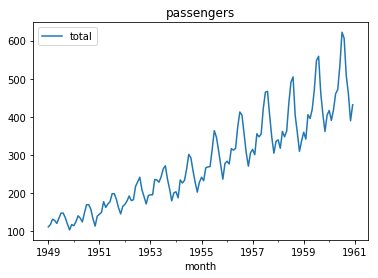

In [139]:
df.plot(title='passengers')

### 自己相関分析 - 周期(季節性)を見つける

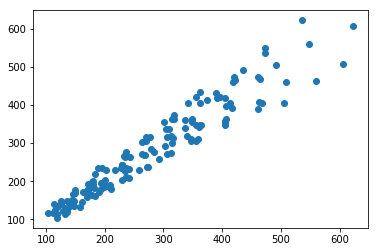

In [137]:
# ラグ=1の相関
plt.scatter(df[:-1], df[1:])

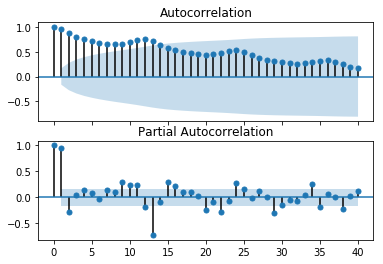

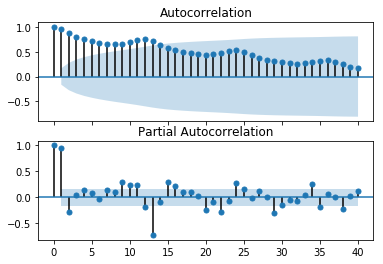

In [158]:
# 自己相関/偏自己相関(コレログラム)
# -> 12ヶ月毎の季節性があることが分かる
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
sm.graphics.tsa.plot_acf(df.total, lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(df.total, lags=40, ax=ax2)

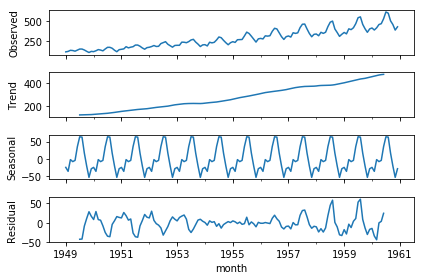

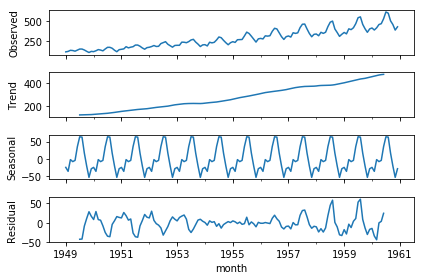

In [135]:
# 季節成分の抽出
sd = sm.tsa.seasonal_decompose(df.total, freq=12)
sd.plot()

### 定常性

In [121]:
# 定常性を持つか検定
# 拡張Dickey-Fuller検定(ADF検定)
res = sm.tsa.stattools.adfuller(df.total)
print('p-value = {:.4}'.format(res[1]))

p-value = 0.9919


**p > 0.5より棄却され、定常性を持つとはいえないデータであると分かる**

定常性をもつように、データの前処理を行う

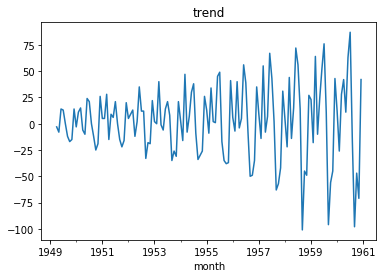

In [160]:
# トレンド(差分)
df.total.diff().plot(title='trend')

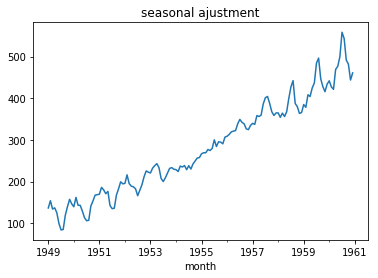

In [130]:
# 季節調整
(df.total - sd.seasonal).plot(title='seasonal ajustment')

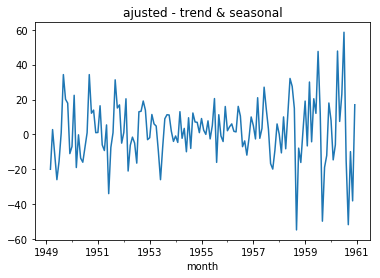

In [157]:
# トレンド(差分) + 季節調整
data = (df.total - sd.seasonal).diff()
df['ajusted_total'] = data
df = df.dropna()
df.ajusted_total.plot(title='ajusted - trend & seasonal')

In [161]:
# 再度定常性の確認
res = sm.tsa.stattools.adfuller(df.ajusted_total)
print('p-value = {:.4}'.format(res[1]))

p-value = 0.01787


**p < 0.5より棄却され、定常性があることが確認できた**